In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',500)

# Books Dataset

In [4]:
books = pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.shape

(271360, 8)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:
books.iloc[187689,1]

'The Credit Suisse Guide to Managing Your Personal Wealth'

In [10]:
books[books['Book-Title']=='The Credit Suisse Guide to Managing Your Personal Wealth']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [11]:
books[books['Book-Title']=='Tyrant Moon']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [12]:
books.iloc[0,-1]

'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg'

In [13]:
books.iloc[1,-1]

'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg'

In [14]:
books.iloc[2,-1]

'http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg'

In [15]:
books['Book-Title'].value_counts().sort_values(ascending=False).head()

Selected Poems       27
Little Women         24
Wuthering Heights    21
The Secret Garden    20
Dracula              20
Name: Book-Title, dtype: int64

In [16]:
books[books['Book-Title']=='Finders Keepers'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...
42019,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...
58264,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [17]:
books[books['Book-Title']=='Selected Poems'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...


In [18]:
print(len(books['ISBN'].unique()))
print(len(books['Book-Title'].unique()))
print(len(books['Book-Author'].unique()))
print(len(books['Year-Of-Publication'].unique()))

271360
242135
102024
202


In [19]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [20]:
books=books.dropna().reset_index(drop=True)

In [21]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [22]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int64)

In [23]:
books.shape

(271354, 5)

In [24]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [25]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [26]:
books.describe()

,Year-Of-Publication
count,271354.000000
mean,1959.760379
std,257.995618
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [27]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [28]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [29]:
books['Book-Author']=[i.title() for i in books['Book-Author']]
books['Book-Author']=[i.strip() for i in books['Book-Author']]
books['Book-Author']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Book-Author']]

books['Book-Title']=[i.title() for i in books['Book-Title']]
books['Book-Title']=[i.strip() for i in books['Book-Title']]
books['Book-Title']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Book-Title']]

books['Publisher']=[i.title() for i in books['Publisher']]
books['Publisher']=[i.strip() for i in books['Publisher']]
books['Publisher']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Publisher']]

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,Harperflamingo Canada
2,0060973129,Decision In Normandy,Carlo DEste,1991,Harperperennial
3,0374157065,Flu The Story Of The Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies Of Urumchi,E J W Barber,1999,W W Norton Amp Company
...,...,...,...,...,...
271349,0440400988,ThereS A Bat In Bunk Five,Paula Danziger,1988,Random House Childrens Pub Mm
271350,0525447644,From One To One Hundred,Teri Sloat,1991,Dutton Books
271351,006008667X,Lily Dale The True Story Of The Town That Tal...,Christine Wicker,2004,Harpersanfrancisco
271352,0192126040,Republic WorldS Classics,Plato,1996,Oxford University Press


In [30]:
zero_pub = books[(books['Year-Of-Publication']==0)].copy()
zero_pub

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,Philipp Reclam Jun Verlag Gmbh
188,342311360X,Die Liebe In Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag Dtv
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,Herr Der Fliegen Fiction Poetry And Drama,Golding,0,Fischer Taschenbuch Verlag Gmbh
542,8845229041,Biblioteca Universale Rizzoli Sulla Sponda Del...,P Coelho,0,Fabbri Rcs Libri
...,...,...,...,...,...
270788,014029953X,Foe EssentialPenguin S,JM Coetzee,0,Penguin Books Ltd
270907,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271088,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271176,0887781721,Tom Penny,Tony German,0,P Martin Associates


In [31]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int32)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [32]:
title = list(zero_pub['Book-Title'])

In [33]:
zero_pub[zero_pub['Book-Title']=='Rainbow The Stormy Life Of Judy Garland']['Year-Of-Publication']

641    0
Name: Year-Of-Publication, dtype: int64

In [34]:
list(books[(books['Book-Title']=='Kabale Und Liebe') & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values)


[]

In [35]:
for i in title:
    d = (list(books[(books['Book-Title']==i) & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values))
    if len(d)!=0:
        zero_pub.loc[zero_pub['Book-Title']==i,'Year-Of-Publication']=d[0]

In [36]:
zero_pub[zero_pub['Year-Of-Publication']==0].shape

(3462, 5)

In [37]:
zero_pub.shape

(4618, 5)

In [38]:
books[books['Year-Of-Publication']==0].shape

(4618, 5)

In [39]:
for i in title:
    d = (list(books[(books['Book-Title']==i) & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values))
    if len(d)!=0:
        books.loc[(books['Book-Title']==i) & (books['Year-Of-Publication']==0) ,'Year-Of-Publication']=d[0]

In [40]:
books[books['Year-Of-Publication']==0].shape

(3462, 5)

In [41]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [42]:
books[books['Year-Of-Publication']==0].shape

(3462, 5)

In [43]:
mdin = books['Year-Of-Publication'].median()
mdin

1995.0

In [44]:
books[books['Year-Of-Publication']>2022].shape

(13, 5)

In [45]:
books.loc[books['Year-Of-Publication']==0,'Year-Of-Publication']=mdin
books.loc[books['Year-Of-Publication']>2022,'Year-Of-Publication']=mdin


In [46]:
books[books['Year-Of-Publication']==0].shape

(0, 5)

In [47]:
list(books['Book-Author'].value_counts().head(20))

[636,
 571,
 534,
 428,
 419,
 373,
 344,
 319,
 308,
 307,
 286,
 285,
 236,
 230,
 222,
 221,
 220,
 220,
 214,
 214]

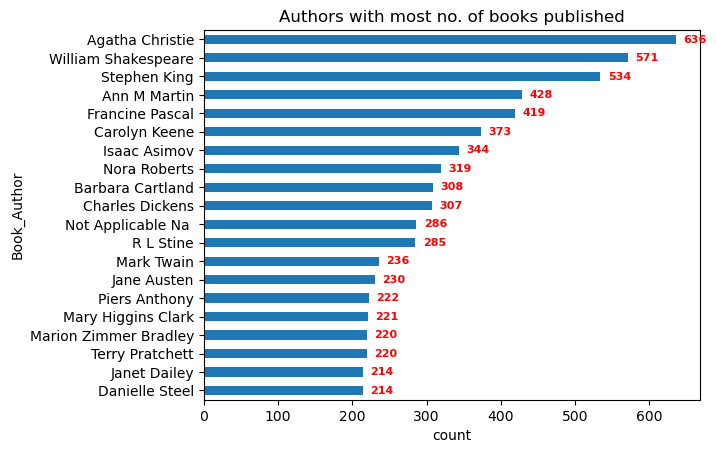

<Figure size 1600x1200 with 0 Axes>

In [48]:
ax=books['Book-Author'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book_Author')
plt.title('Authors with most no. of books published')
plt.figure(figsize=(16,12))
for i,v in enumerate(list(books['Book-Author'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',fontweight='bold',fontsize=8,color='red')

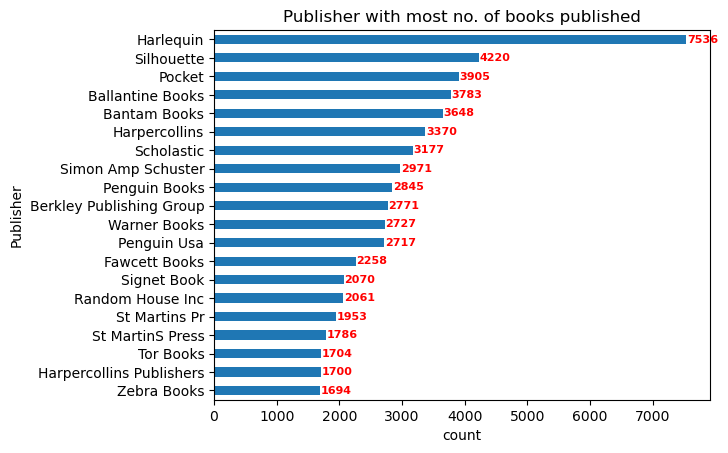

<Figure size 1600x1200 with 0 Axes>

In [49]:
ax=books['Publisher'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Publisher')
plt.title('Publisher with most no. of books published')
plt.figure(figsize=(16,12))
for i,v in enumerate(list(books['Publisher'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',fontweight='bold',fontsize=8,color='red')

# ratings dataset

In [50]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [51]:
ratings.shape

(1149780, 3)

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [53]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [54]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [55]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating


In [56]:
print(len(ratings['ISBN'].unique()))
print(len(ratings['User-ID'].unique()))

340556
105283


# combine books+ratings

In [57]:
combine = pd.merge(ratings,books,on='ISBN',how='inner')
combine.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones A Novel,M J Rose,2002,Ballantine Books


In [58]:
combine.shape

(1031129, 7)

In [59]:
combine.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [60]:
combine[combine.duplicated()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [61]:
print(len(combine['ISBN'].unique()))
print(len(combine['Book-Title'].unique()))
print(len(combine['User-ID'].unique()))

270145
236769
92106


# users dataset

In [62]:
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [63]:
users.shape

(278858, 3)

In [64]:
len(users['User-ID'].unique())  ## all user-id are unique in users dataset

278858

In [65]:
len(users['Location'].unique())

57339

In [66]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [67]:
users[users['Age']>120].shape

(78, 3)

In [68]:
users[users['Age']<5].shape

(882, 3)

In [69]:
users[users.duplicated()]

,User-ID,Location,Age


In [70]:
users.iloc[4,1].split(',')[-1].strip().title()

'United Kingdom'

In [71]:
users['Country'] = [i.split(',')[-1].strip().title() for i in users['Location']]

In [72]:
users.loc[users['Country']=='','Country']='others'

In [73]:
list(users['Country'].value_counts().head(10).sort_values())

[3325, 3455, 4578, 11266, 11784, 13147, 17043, 18538, 21658, 139711]

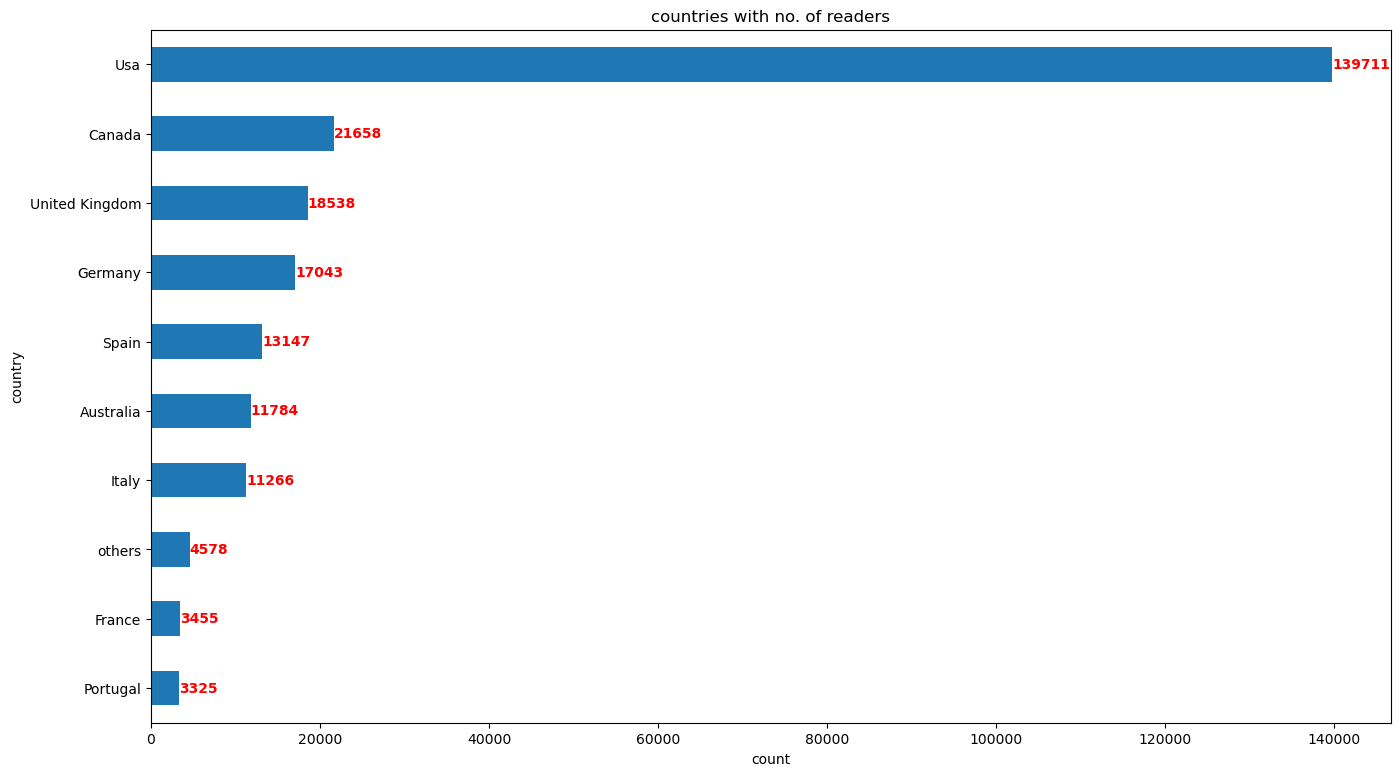

In [74]:
plt.figure(figsize=(16,9))
ax=users['Country'].value_counts().head(10).sort_values().plot(kind='barh')
plt.ylabel('country')
plt.xlabel('count')
plt.title('countries with no. of readers')
for i,v in enumerate(list(users['Country'].value_counts().head(10).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

# master data combine(books+raings) + users

In [75]:
uncleaned_master_data = pd.merge(combine,users,on='User-ID',how='inner')
uncleaned_master_data.shape

(1031129, 10)

In [76]:
uncleaned_master_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"tyler, texas, usa",NaN,Usa
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,Usa
2,2313,0812533550,9,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,Usa
3,2313,0679745580,8,In Cold Blood Vintage International,Truman Capote,1994,Vintage,"cincinnati, ohio, usa",23.0,Usa
4,2313,0060173289,9,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,1996,Harpercollins,"cincinnati, ohio, usa",23.0,Usa


In [77]:
uncleaned_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031129 non-null  int64  
 1   ISBN                 1031129 non-null  object 
 2   Book-Rating          1031129 non-null  int64  
 3   Book-Title           1031129 non-null  object 
 4   Book-Author          1031129 non-null  object 
 5   Year-Of-Publication  1031129 non-null  int32  
 6   Publisher            1031129 non-null  object 
 7   Location             1031129 non-null  object 
 8   Age                  753296 non-null   float64
 9   Country              1031129 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 82.6+ MB


In [78]:
uncleaned_master_data.describe()

,User-ID,Book-Rating,Year-Of-Publication,Age
count,1.031129e+06,1.031129e+06,1.031129e+06,753296.000000
mean,1.405945e+05,2.839039e+00,1.995274e+03,37.397658
std,8.052485e+04,3.854152e+00,7.348114e+00,14.098257
min,2.000000e+00,0.000000e+00,1.376000e+03,0.000000
25%,7.041500e+04,0.000000e+00,1.992000e+03,28.000000
50%,1.412100e+05,0.000000e+00,1.997000e+03,35.000000
75%,2.114260e+05,7.000000e+00,2.001000e+03,45.000000
max,2.788540e+05,1.000000e+01,2.021000e+03,244.000000


In [79]:
uncleaned_master_data.isna().any()

User-ID                False
ISBN                   False
Book-Rating            False
Book-Title             False
Book-Author            False
Year-Of-Publication    False
Publisher              False
Location               False
Age                     True
Country                False
dtype: bool

In [80]:
uncleaned_master_data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Location                    0
Age                    277833
Country                     0
dtype: int64

In [81]:
print(len(uncleaned_master_data['ISBN'].unique()))
print(len(uncleaned_master_data['Book-Title'].unique()))
print(len(uncleaned_master_data['User-ID'].unique()))

270145
236769
92106


In [82]:
columns = uncleaned_master_data.columns
for i in columns:
    print(uncleaned_master_data[i].value_counts())

11676     11144
198711     6456
153662     5814
98391      5777
35859      5646
          ...  
4002          1
78202         1
4016          1
55986         1
276660        1
Name: User-ID, Length: 92106, dtype: int64
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
1570426562       1
1578630169       1
1580623026       1
1581801998       1
0583307841       1
Name: ISBN, Length: 270145, dtype: int64
0     647291
8      91803
10     71225
7      66401
9      60776
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: Book-Rating, dtype: int64
Wild Animus                                                  2502
The Lovely Bones A Novel                                     1295
The Da Vinci Code                                             898
A Painted House                                               838
The Nanny Diaries A Novel                                     828
                          

In [83]:
uncleaned_master_data['Age'].value_counts().sort_index()

0.0        561
1.0        428
2.0        321
3.0        143
4.0        271
5.0        159
6.0         14
7.0        148
8.0        542
9.0       2056
10.0       227
11.0       513
12.0       747
13.0      1243
14.0      3206
15.0      3165
16.0      3299
17.0      5282
18.0      8747
19.0      5246
20.0      6487
21.0     10062
22.0     12101
23.0     18793
24.0     18572
25.0     21768
26.0     22106
27.0     22280
28.0     25966
29.0     30646
30.0     27201
31.0     25963
32.0     26490
33.0     32862
34.0     25893
35.0     19573
36.0     26096
37.0     21116
38.0     22396
39.0     17002
40.0     15521
41.0     15900
42.0     10759
43.0     20612
44.0     21510
45.0     11792
46.0     16345
47.0     18517
48.0      7666
49.0     14345
50.0      9451
51.0     14033
52.0     17635
53.0      6881
54.0     10106
55.0      6029
56.0      8337
57.0      8918
58.0      8850
59.0      2913
60.0      3646
61.0      4201
62.0      8382
63.0      3055
64.0      1077
65.0      3949
66.0      

In [84]:
uncleaned_master_data[uncleaned_master_data['Age']<6].shape

(1883, 10)

In [85]:
uncleaned_master_data[uncleaned_master_data['Age']>120].shape

(1130, 10)

In [86]:
uncleaned_master_data[uncleaned_master_data['Age']>120]['Book-Title'].value_counts()

Visions Of Sugar Plums                                                                    3
A Thin Dark Line Mysteries Amp Horror                                                     3
A Painted House                                                                           2
Law Of Gravity                                                                            2
For All Their Lives                                                                       2
                                                                                         ..
Children Of The Flames Dr Josef Mengele And The Untold Story Of The Twins Of Auschwitz    1
The Confession The Heritage Of Lancaster County Volume 2                                  1
The Pretender                                                                             1
Ruby Dakota Treasures 1                                                                   1
Pc Power Secrets How To Make Any Pc Run Faster                                  

In [87]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<15)]['Age'].value_counts().sort_index()

6.0       14
7.0      148
8.0      542
9.0     2056
10.0     227
11.0     513
12.0     747
13.0    1243
14.0    3206
Name: Age, dtype: int64

In [88]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<15)]['Age'].value_counts().sort_index()

6.0       14
7.0      148
8.0      542
9.0     2056
10.0     227
11.0     513
12.0     747
13.0    1243
14.0    3206
Name: Age, dtype: int64

In [89]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<10)]['Book-Title'].value_counts()

Bears On Wheels Bright Amp Early Books                  4
The Yellow House Mystery Boxcar Children Series No 3    3
The Encounter Animorphs  No 3                           3
CharlotteS Web                                          3
Beezus And Ramona                                       3
                                                       ..
Point Of Impact                                         1
Lorna Doone Wordsworth Collection                       1
Off The Mangrove Coast                                  1
Real Ponies DonT Go Oink                                1
SingenpooS Secret Weapon                                1
Name: Book-Title, Length: 2629, dtype: int64

# Visualisations for master data

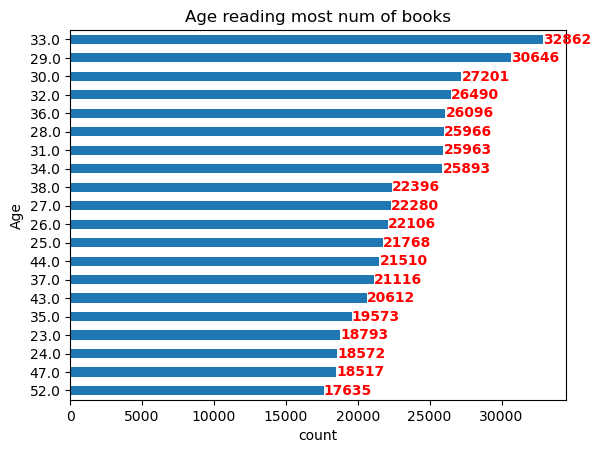

In [90]:
ax=uncleaned_master_data['Age'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Age')
plt.title('Age reading most num of books')
for i,v in enumerate(list(uncleaned_master_data['Age'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

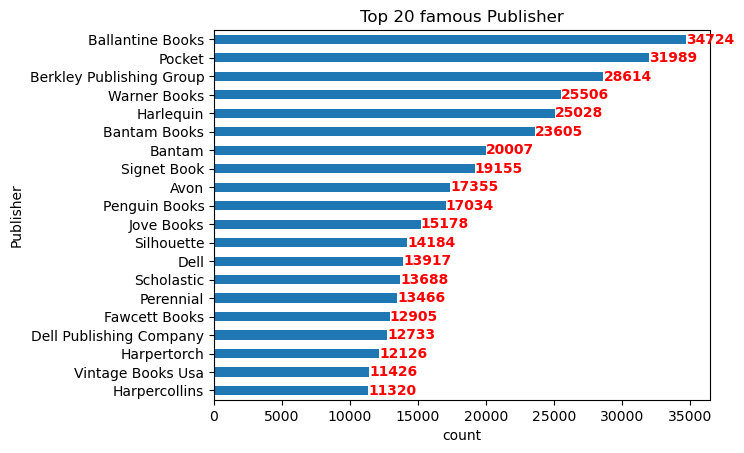

In [91]:
ax=uncleaned_master_data['Publisher'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Publisher')
plt.title('Top 20 famous Publisher')
for i,v in enumerate(list(uncleaned_master_data['Publisher'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

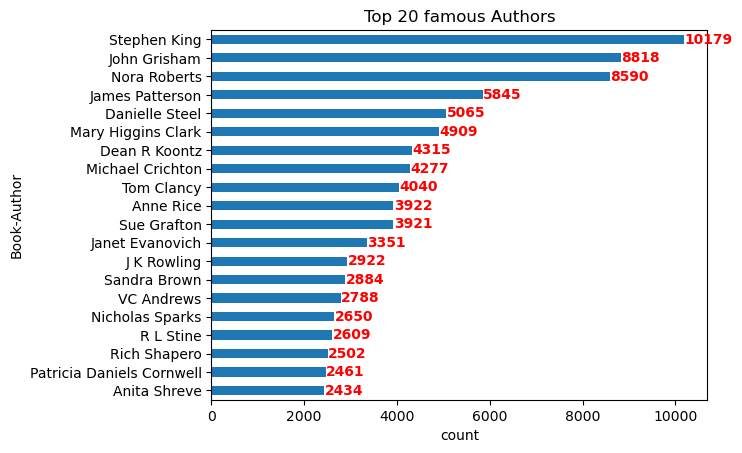

In [92]:
ax=uncleaned_master_data['Book-Author'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.title('Top 20 famous Authors')
for i,v in enumerate(list(uncleaned_master_data['Book-Author'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

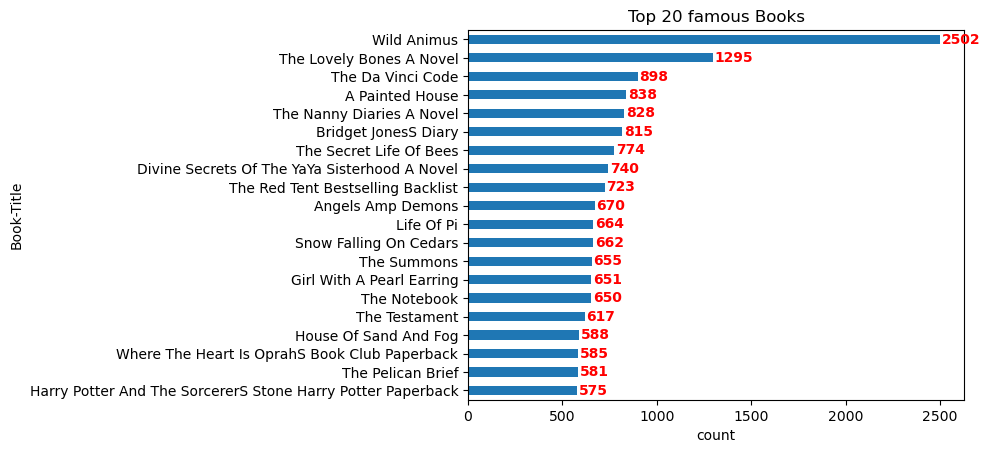

In [93]:
ax=uncleaned_master_data['Book-Title'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.title('Top 20 famous Books')
for i,v in enumerate(list(uncleaned_master_data['Book-Title'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

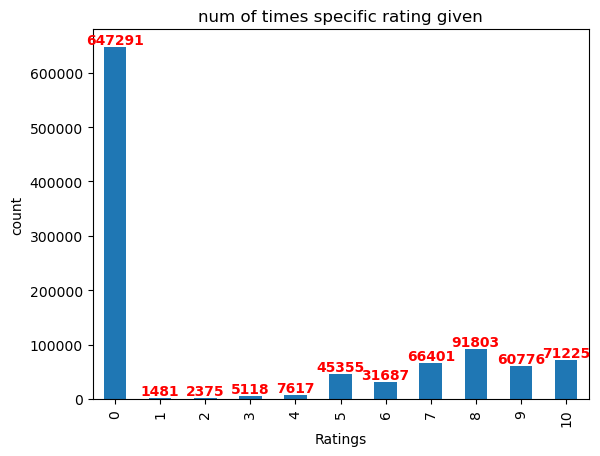

In [94]:
ax=uncleaned_master_data['Book-Rating'].value_counts().head(20).sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.title('num of times specific rating given')
for i,v in enumerate(list(uncleaned_master_data['Book-Rating'].value_counts().head(20).sort_index())):
    ax.text(i,v+10,str(v),ha='center',va='bottom',color='red',fontweight='bold')

In [95]:
top_rated_books = pd.DataFrame(np.round(uncleaned_master_data.groupby(['Book-Title']).mean(),0)['Book-Rating'])
top_rated_books

,Book-Rating
Book-Title,
A Novel,0.0
A Nutshell Handbook,3.0
Allo Allo The War Diaries Of Rene Artois,5.0
And For Starters,0.0
Boule De Suif Penguin Classics,7.0
...,...
ÃÂLpiraten,0.0
ÃÂRger Mit Produkt X Roman,5.0
ÃÂSterlich Leben,7.0


In [96]:
top_rated_books[top_rated_books['Book-Rating']==10]

,Book-Rating
Book-Title,
006781 Bk1 Gags De Boule Et Bil,10.0
10 American History Plays For The Classroom Grades 48,10.0
10 Gebote FãÂ¼R Anspruchsvolle Frauen,10.0
10 Real Sats Serial,10.0
10 Real Sats Third Edition,10.0
...,...
Zwei FãÂ¤Lle FãÂ¼R Mrs Murphy Schade DaãÂ Du Nicht Tot Bist Ruhe In Fetzen,10.0
ZwãÂ¶Lf Goldene FãÂ¤Den Lebensweisheiten Einer Wundervollen Grossmutter,10.0
Ã Sucesso Solo 50 Anni Fa Lo Sterminio Di Sei Milioni Di Ebrei,10.0


In [97]:
top_read_books = list(uncleaned_master_data['Book-Title'].value_counts().head(20).index)
top_read_books

['Wild Animus',
 'The Lovely Bones A Novel',
 'The Da Vinci Code',
 'A Painted House',
 'The Nanny Diaries A Novel',
 'Bridget JonesS Diary',
 'The Secret Life Of Bees',
 'Divine Secrets Of The YaYa Sisterhood A Novel',
 'The Red Tent Bestselling Backlist',
 'Angels Amp Demons',
 'Life Of Pi',
 'Snow Falling On Cedars',
 'The Summons',
 'Girl With A Pearl Earring',
 'The Notebook',
 'The Testament',
 'House Of Sand And Fog',
 'Where The Heart Is OprahS Book Club Paperback',
 'The Pelican Brief',
 'Harry Potter And The SorcererS Stone Harry Potter Paperback']

In [98]:
top_books_rating = []
for i in top_read_books:
    top_books_rating.append(top_rated_books.loc[i,'Book-Rating'])

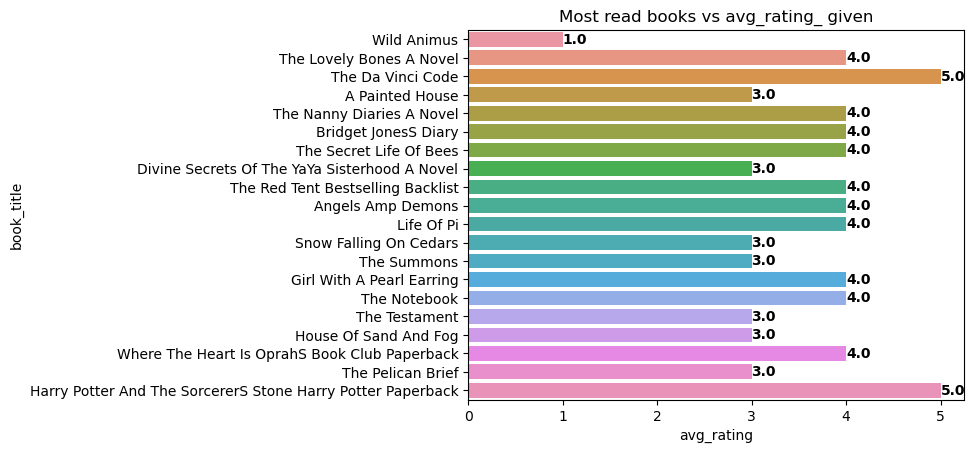

In [99]:
ax=sns.barplot(x=top_books_rating,y=top_read_books)
plt.xlabel('avg_rating')
plt.ylabel('book_title')
plt.title('Most read books vs avg_rating_ given')
for i,v in enumerate(top_books_rating):
    ax.text(v,i,str(v),fontweight='bold',ha='left',va='center')


# Imputation for Age feature

In [100]:
age_books = uncleaned_master_data[['Age','Book-Title','Book-Author','Publisher']].copy()
age_books

,Age,Book-Title,Book-Author,Publisher
0,NaN,Flesh Tones A Novel,M J Rose,Ballantine Books
1,23.0,Flesh Tones A Novel,M J Rose,Ballantine Books
2,23.0,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,Tor Books
3,23.0,In Cold Blood Vintage International,Truman Capote,Vintage
4,23.0,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,Harpercollins
...,...,...,...,...
1031124,62.0,Le Huit,Katherine Neville,Le Cherche Midi
1031125,NaN,Ludwig Marum Briefe Aus Dem Konzentrationslage...,Ludwig Marum,CF Mã¼Ller
1031126,13.0,Christmas With Anne And Other Holiday Stories ...,L M Montgomery,Starfire
1031127,13.0,Heaven Coretta Scott King Author Award Winner,Angela Johnson,Simon Amp Schuster ChildrenS Publishing


In [101]:
age_books.isna().sum()

Age            277833
Book-Title          0
Book-Author         0
Publisher           0
dtype: int64

In [102]:
age_books[age_books['Age']>120]

,Age,Book-Title,Book-Author,Publisher
68167,201.0,A Painted House,John Grisham,Doubleday
68168,201.0,How Stella Got Her Groove Back,Terry Mcmillan,Signet Book
68169,201.0,The Lovely Bones A Novel,Alice Sebold,Little Brown
68170,201.0,The Da Vinci Code,Dan Brown,Doubleday
68171,201.0,Harry Potter And The Chamber Of Secrets Book 2,J K Rowling,Scholastic
...,...,...,...,...
1024475,132.0,Les Champs Dhonneur,Jean Rouaud,Les Editions De Minuit
1025800,127.0,Melissa MillerS Definitive Iq Test For Dogs An...,Melissa Miller,Signet Books
1025801,127.0,Whiskey FãÂ¼R Den Weihnachtsmann Irische Weihn...,John B Keane,Aufbau Tb
1025802,127.0,Quatemberkinder Und Wie Das Vreneli Die Gletsc...,Tim Krohn,Aufbau Tb


In [103]:
age_books[age_books['Age']>120]['Book-Title'].value_counts()

Visions Of Sugar Plums                                                                    3
A Thin Dark Line Mysteries Amp Horror                                                     3
A Painted House                                                                           2
Law Of Gravity                                                                            2
For All Their Lives                                                                       2
                                                                                         ..
Children Of The Flames Dr Josef Mengele And The Untold Story Of The Twins Of Auschwitz    1
The Confession The Heritage Of Lancaster County Volume 2                                  1
The Pretender                                                                             1
Ruby Dakota Treasures 1                                                                   1
Pc Power Secrets How To Make Any Pc Run Faster                                  

In [104]:
age_books[age_books['Age']>120]['Book-Author'].value_counts().head(300)

Catherine Coulter                           17
Mary Higgins Clark                          14
Janet Evanovich                             14
Debbie Macomber                             12
Stephen King                                12
John Grisham                                11
Tim Lahaye                                  10
Lilian Jackson Braun                        10
Tami Hoag                                    9
Fern Michaels                                9
Max Lucado                                   8
Andrew M Greeley                             7
Beverly Lewis                                6
Anne Rice                                    6
Michael Crichton                             6
Danielle Steel                               6
Robert James Waller                          5
Louis LAmour                                 5
Anne Perry                                   5
James Patterson                              5
Roald Dahl                                   5
Nora Roberts 

In [105]:
age_books[age_books['Age']>120]['Publisher'].value_counts().head(500)

Ballantine Books                                              37
Pocket                                                        31
Warner Books                                                  29
Bantam Books                                                  26
Bantam                                                        25
Signet Book                                                   23
Penguin Books                                                 23
Viking Books                                                  21
Simon Amp Schuster                                            20
St MartinS Press                                              18
Tyndale House Publishers                                      15
Penguin Usa                                                   15
Ivy Books                                                     14
Jove Books                                                    14
Berkley Publishing Group                                      13
Avon                     

In [106]:
publisher = list(age_books[age_books['Age']>120]['Publisher'].value_counts().head(400).index)

In [107]:
age_books[age_books['Publisher']=='Ballantine Books']['Age'].value_counts().sort_values(ascending=False).head()

33.0    1116
29.0     964
28.0     903
30.0     888
32.0     852
Name: Age, dtype: int64

In [108]:
list(age_books[age_books['Publisher']=='Pocket']['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]

33.0

In [109]:
max_age = []
for i in publisher:
    max_age.append(list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index))

In [110]:
for i in publisher:
    m=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age']>120),'Age']=m
                                                

In [111]:
age_books[age_books['Age']>120].shape

(19, 4)

In [112]:
authors = list(age_books[age_books['Age']>120]['Book-Author'].value_counts().head(50).index)

In [113]:
for i in authors:
    n=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age']>120),'Age']=n
                                                

In [114]:
age_books[age_books['Age']>120]['Age'].shape

(15,)

In [115]:
age_books[age_books['Age']<6].shape

(1883, 4)

In [116]:
age_books[age_books['Age']<6]['Publisher'].value_counts().head()


Scholastic                  63
Ballantine Books            42
Penguin Books               40
Berkley Publishing Group    38
Warner Books                33
Name: Publisher, dtype: int64

In [117]:
publisher1 = list(age_books[age_books['Age']<6]['Publisher'].value_counts().head(600).index)
for i in publisher1:
    a=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age']<6),'Age']=a

In [118]:
age_books[age_books['Age']<6].shape

(96, 4)

In [119]:
age_books[age_books['Age']<6]['Book-Author'].value_counts().head()


Robert G Barrett    2
Judy Shasek         2
Robert Rankin       2
Robin Moore         2
Bernard Smith       1
Name: Book-Author, dtype: int64

In [120]:
authors1 = list(age_books[age_books['Age']<6]['Book-Author'].value_counts().head(200).index)
for i in authors1:
    n=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age']<6),'Age']=n

In [121]:
age_books[age_books['Age']<6].shape

(35, 4)

In [122]:
age_books[age_books['Age'].isnull()].shape

(277833, 4)

In [123]:
age_books[age_books['Age'].isnull()]['Publisher'].value_counts().head(510)

Ballantine Books            10017
Pocket                       8637
Berkley Publishing Group     8367
Warner Books                 7388
Bantam Books                 6872
                            ...  
House Of Stratus               42
Kodansha America               42
Abacus                         42
Orchard Books Ny               42
Clarion Books                  42
Name: Publisher, Length: 510, dtype: int64

In [124]:
authors2 = list(age_books[age_books['Age'].isnull()]['Book-Author'].value_counts().head(1500).index)
counter=0
for i in authors2:
    b=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age'].isnull()),'Age']=b
    counter+=1
print(counter)
age_books[age_books['Age'].isnull()].shape

1500


(116622, 4)

In [125]:
publisher2 = list(age_books[age_books['Age'].isnull()]['Publisher'].value_counts().head(750).index)
cnt = 0
for i in publisher2:
    c=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age'].isnull()),'Age']=c
    cnt+=1
print(cnt)
age_books[age_books['Age'].isnull()].shape


750


(20590, 4)

In [126]:
age_books[age_books['Age'].isnull()].shape

(20590, 4)

In [127]:
age_col = age_books['Age']
age_col.shape

(1031129,)

In [128]:
age_col.isnull().sum()

20590

In [129]:
#age_col.to_csv('age_col.csv')

In [130]:
uncleaned_master_data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Location                    0
Age                    277833
Country                     0
dtype: int64

In [131]:
uncleaned_master_data['Age']=age_col

In [132]:
#master_data.to_csv('master_data.csv')

In [133]:
uncleaned_master_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"tyler, texas, usa",33.0,Usa
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,Usa
2,2313,0812533550,9,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,Usa
3,2313,0679745580,8,In Cold Blood Vintage International,Truman Capote,1994,Vintage,"cincinnati, ohio, usa",23.0,Usa
4,2313,0060173289,9,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,1996,Harpercollins,"cincinnati, ohio, usa",23.0,Usa
...,...,...,...,...,...,...,...,...,...,...
1031124,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0,Switzerland
1031125,276618,3788097000,5,Ludwig Marum Briefe Aus Dem Konzentrationslage...,Ludwig Marum,1984,CF Mã¼Ller,"stuttgart, \n/a\""., germany""",NaN,"Germany"""
1031126,276647,0553571001,0,Christmas With Anne And Other Holiday Stories ...,L M Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0,Usa
1031127,276647,0689822294,10,Heaven Coretta Scott King Author Award Winner,Angela Johnson,1998,Simon Amp Schuster ChildrenS Publishing,"arlington heights, illinois, usa",13.0,Usa


In [134]:
uncleaned_master_data.isnull().sum()

User-ID                    0
ISBN                       0
Book-Rating                0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
Location                   0
Age                    20590
Country                    0
dtype: int64

In [135]:
med_teen = uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<20)]['Age'].median()

In [136]:
uncleaned_master_data.loc[uncleaned_master_data['Age']<6,'Age']=med_teen

In [137]:
uncleaned_master_data[uncleaned_master_data['Age']<6]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country


In [138]:
med_senior = uncleaned_master_data[(uncleaned_master_data['Age']>60) & (uncleaned_master_data['Age']<120)]['Age'].median()
med_senior

63.0

In [139]:
uncleaned_master_data.loc[uncleaned_master_data['Age']>120,'Age']=med_senior

In [140]:
uncleaned_master_data[uncleaned_master_data['Age']>120]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country


In [141]:
med_null = uncleaned_master_data['Age'].median()
med_null

33.0

In [142]:
uncleaned_master_data.fillna(med_null,inplace=True)

In [143]:
uncleaned_master_data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
Age                    0
Country                0
dtype: int64

# model building

In [144]:
df_master = uncleaned_master_data[['User-ID','Book-Rating','Book-Title','Age']]

In [146]:
df_master.shape

(1031129, 4)

In [147]:
mean_df = df_master.groupby('Book-Title')['Book-Rating'].mean().reset_index()[['Book-Title','Book-Rating']]

In [148]:
mean_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)

In [149]:
mean_df

,Book-Title,avg_rating
0,A Novel,0.000000
1,A Nutshell Handbook,3.000000
2,Allo Allo The War Diaries Of Rene Artois,5.000000
3,And For Starters,0.000000
4,Boule De Suif Penguin Classics,7.000000
...,...,...
236764,ÃÂLpiraten,0.000000
236765,ÃÂRger Mit Produkt X Roman,5.250000
236766,ÃÂSterlich Leben,7.000000
236767,ÃÂStlich Der Berge,2.666667


In [150]:
user_count_df = df_master.groupby('Book-Title')['Book-Rating'].count().reset_index()[['Book-Title','Book-Rating']]

In [151]:
user_count_df.rename(columns = {'Book-Rating':'num_times_book_rated'},inplace=True)

In [152]:
user_count_df.sort_values('num_times_book_rated')

,Book-Title,num_times_book_rated
0,A Novel,1
132151,Online Friendship ChatRoom Romance And Cyberse...,1
132152,Online Kids A Young SurferS Guide To Cyberspace,1
132154,Online Resources For Business Getting The Info...,1
132157,Only A Dream Away Two By Two Romance,1
...,...,...
196553,The Nanny Diaries A Novel,828
5349,A Painted House,838
180416,The Da Vinci Code,898
193574,The Lovely Bones A Novel,1295


# popularity based recommendation for early stage readers (which has read less than 10 books)

In [154]:
merged_data_1 = pd.merge(mean_df,df_master,on='Book-Title')

In [155]:
merged_data_1.shape

(1031129, 5)

In [156]:
merged_data_2 = pd.merge(merged_data_1,user_count_df,on='Book-Title')

In [157]:
merged_data_2.shape

(1031129, 6)

In [158]:
books_read_count = df_master.groupby('User-ID')['Book-Rating'].count().reset_index()[['User-ID','Book-Rating']]

In [159]:
books_read_count.rename(columns={'Book-Rating':'num_of_books_read'},inplace=True)

In [160]:
books_read_count

,User-ID,num_of_books_read
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1
...,...,...
92101,278846,1
92102,278849,4
92103,278851,23
92104,278852,1


In [161]:
model_data = pd.merge(merged_data_2,books_read_count,on='User-ID')

In [162]:
model_data.sort_values('num_times_book_rated')

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read
0,A Novel,0.000000,102967,0,54.0,1,2285
366667,Portable DH Lawrence Viking Portable Library,8.000000,129716,8,30.0,1,624
366670,Practicing For Heaven,0.000000,129716,0,30.0,1,624
366687,Russia A History,0.000000,129716,0,30.0,1,624
366694,Scrambled Eggs Amp Whiskey Poems 19911995,9.000000,129716,9,30.0,1,624
...,...,...,...,...,...,...,...
864999,Wild Animus,1.019584,242642,0,57.0,2502,11
856483,Wild Animus,1.019584,53189,0,28.0,2502,10
1018001,Wild Animus,1.019584,228750,0,28.0,2502,2
942453,Wild Animus,1.019584,106742,0,19.0,2502,3


In [1]:
final_model = model_data[(model_data['avg_rating']>7) & (model_data['num_times_book_rated']>10)]
final_model

NameError: name 'model_data' is not defined

In [164]:
most_famous_books = final_model['Book-Title'].unique().tolist()
most_famous_books

['Die Unendliche Geschichte Von A Bis Z',
 'Der Kleine Hobbit',
 'El Hobbit',
 'FixIt And ForgetIt Cookbook Feasting With Your Slow Cooker',
 'Free',
 'The Napping House',
 'The Teenage Liberation Handbook How To Quit School And Get A Real Life And Education',
 'Where The Sidewalk Ends  Poems And Drawings',
 'The Baby Book Everything You Need To Know About Your Baby From Birth To Age Two',
 'Prescription For Nutritional Healing A Practical AZ Reference To DrugFree Remedies Using Vitamins Minerals Herbs Amp Food Supplements',
 'A Kiss For Little Bear',
 'How The Grinch Stole Christmas',
 'The Lorax',
 'ThereS Treasure EverywhereA Calvin And Hobbes Collection',
 'The Night The Bear Ate Goombaw',
 'Warchild',
 'Good Faeries Bad Faeries',
 'AinT NobodyS Business If You Do  The Absurdity Of Consensual Crimes In Our Free Country',
 'Sailing Alone Around The Room New And Selected Poems',
 'Jesus Freaks Dc Talk And The Voice Of The Martyrs  Stories Of Those Who Stood For Jesus The Ultimate Jes

In [165]:
rating_famous_books = []
for i in most_famous_books:
    z=final_model[final_model['Book-Title']==i]['avg_rating'].unique()[0]
    rating_famous_books.append(z)
rating_famous_books

[8.071428571428571,
 7.947368421052632,
 7.6923076923076925,
 7.75,
 8.017857142857142,
 7.214285714285714,
 7.176470588235294,
 7.121212121212121,
 8.461538461538462,
 7.142857142857143,
 7.1,
 7.3076923076923075,
 8.166666666666666,
 7.882352941176471,
 7.153846153846154,
 7.615384615384615,
 7.454545454545454,
 7.583333333333333,
 7.133333333333334,
 7.533333333333333,
 7.2727272727272725,
 8.035714285714286,
 9.181818181818182,
 8.0,
 7.6,
 7.076923076923077,
 8.066666666666666,
 7.461538461538462]

Text(0.5, 1.0, 'books with highest avg-rating')

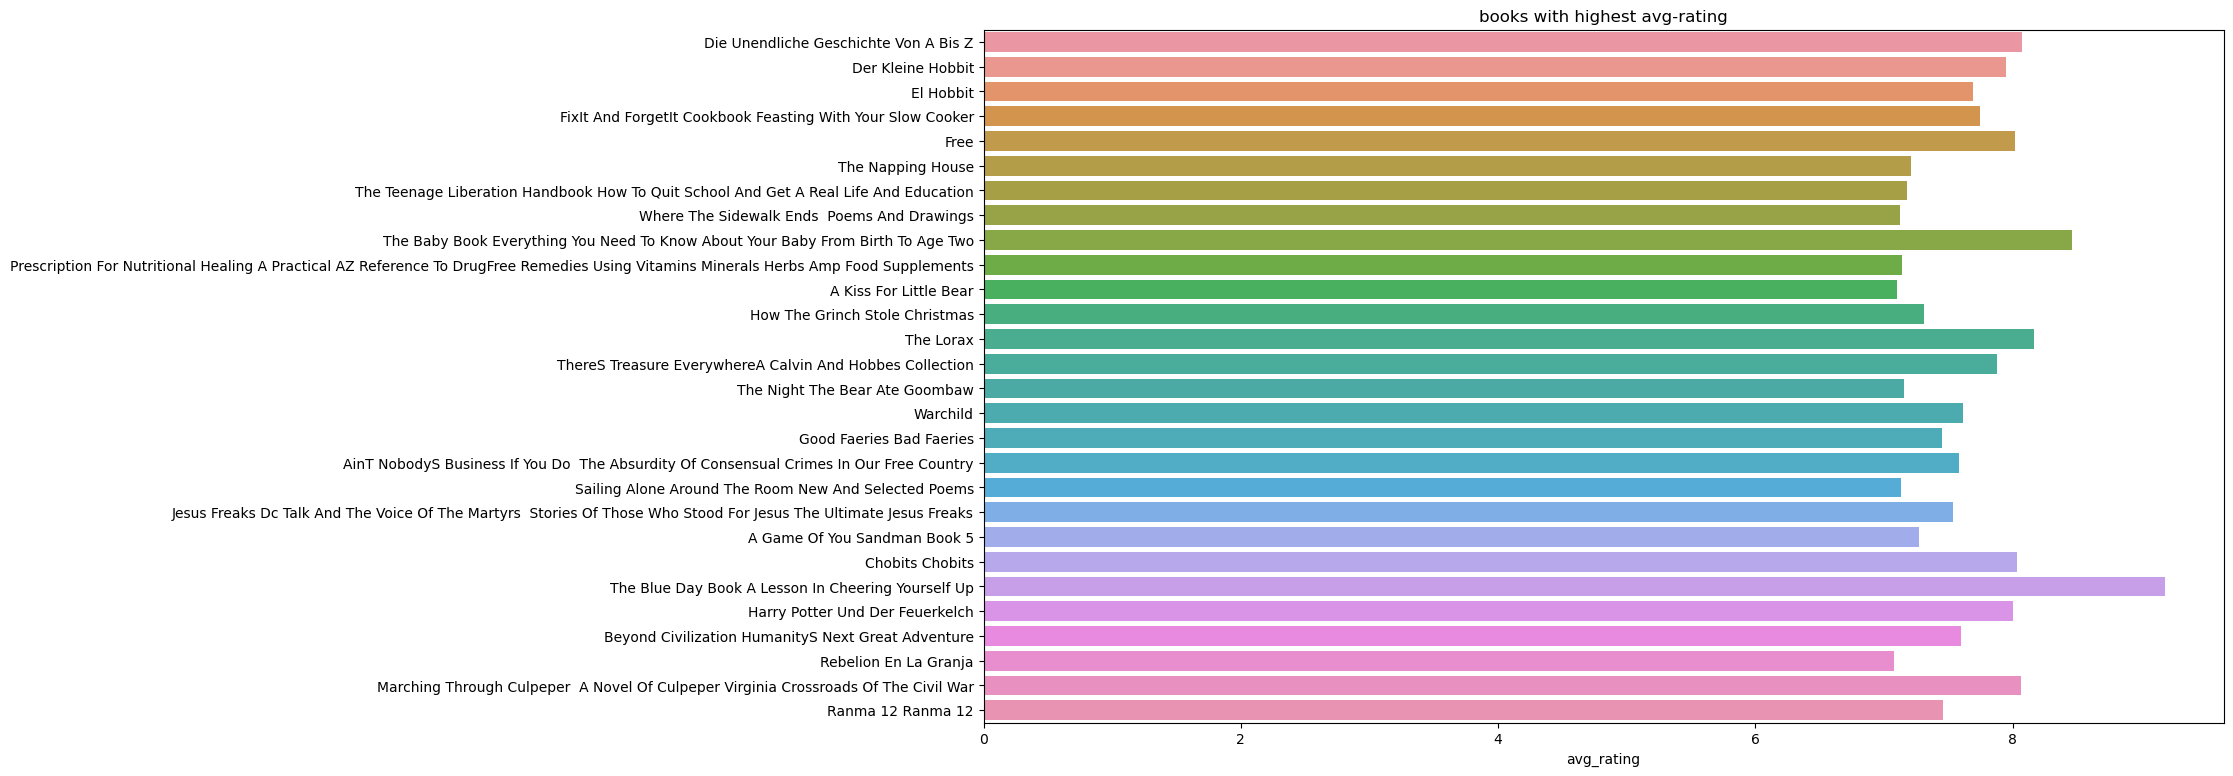

In [166]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=rating_famous_books,y=most_famous_books)
plt.xlabel('avg_rating')
plt.title('books with highest avg-rating')

In [167]:
new_readers_userid = list(model_data[model_data['num_of_books_read']<11]['User-ID'].unique())
new_readers_userid

[85099,
 135872,
 46054,
 92554,
 204124,
 267609,
 236515,
 276813,
 278161,
 3323,
 53943,
 86284,
 38308,
 98763,
 154218,
 216945,
 115875,
 117258,
 40840,
 63228,
 232624,
 163821,
 115754,
 233776,
 8100,
 191072,
 208417,
 149810,
 187289,
 255744,
 122647,
 163588,
 199756,
 262437,
 257269,
 228904,
 270006,
 180702,
 107382,
 72540,
 10951,
 22351,
 112898,
 36597,
 64185,
 19060,
 6689,
 222901,
 41624,
 94503,
 137766,
 3077,
 227131,
 121849,
 271598,
 139376,
 28601,
 170198,
 254756,
 84584,
 19886,
 188120,
 18403,
 64596,
 172905,
 12965,
 61298,
 246913,
 200001,
 149825,
 11844,
 94900,
 174586,
 160340,
 254383,
 146993,
 202668,
 236790,
 222409,
 152956,
 130396,
 124723,
 140802,
 12246,
 123925,
 163816,
 194296,
 115161,
 149153,
 133542,
 223134,
 19046,
 156499,
 145706,
 126928,
 203963,
 160449,
 146641,
 121493,
 245428,
 27745,
 162654,
 59615,
 161916,
 106338,
 48662,
 132383,
 106453,
 18470,
 129665,
 80119,
 64498,
 180569,
 271988,
 5923,
 237234,


In [168]:
def new_user_rec(user_id):
    user_books = set(uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'])
    return set(most_famous_books)-user_books

In [169]:
new_user_rec(64142)

{'A Game Of You Sandman Book 5',
 'A Kiss For Little Bear',
 'AinT NobodyS Business If You Do  The Absurdity Of Consensual Crimes In Our Free Country',
 'Beyond Civilization HumanityS Next Great Adventure',
 'Chobits Chobits',
 'Der Kleine Hobbit',
 'Die Unendliche Geschichte Von A Bis Z',
 'El Hobbit',
 'FixIt And ForgetIt Cookbook Feasting With Your Slow Cooker',
 'Free',
 'Good Faeries Bad Faeries',
 'Harry Potter Und Der Feuerkelch',
 'How The Grinch Stole Christmas',
 'Jesus Freaks Dc Talk And The Voice Of The Martyrs  Stories Of Those Who Stood For Jesus The Ultimate Jesus Freaks',
 'Marching Through Culpeper  A Novel Of Culpeper Virginia Crossroads Of The Civil War',
 'Prescription For Nutritional Healing A Practical AZ Reference To DrugFree Remedies Using Vitamins Minerals Herbs Amp Food Supplements',
 'Ranma 12 Ranma 12',
 'Rebelion En La Granja',
 'Sailing Alone Around The Room New And Selected Poems',
 'The Baby Book Everything You Need To Know About Your Baby From Birth To 

In [170]:
final_model.loc[final_model['avg_rating'].idxmax(),['Book-Title','avg_rating']]

Book-Title    The Blue Day Book A Lesson In Cheering Yoursel...
avg_rating                                             9.181818
Name: 300764, dtype: object

# Similarity based model for book recommendation for frequent readers

In [172]:
model_data.shape

(1031129, 7)

In [173]:
model_data[model_data['Book-Rating']==0].shape

(647291, 7)

In [174]:
rating_based_similarity= model_data[model_data['Book-Rating']!=0]
rating_based_similarity.shape

(383838, 7)

In [175]:
rating_based_similarity.isnull().sum()

Book-Title              0
avg_rating              0
User-ID                 0
Book-Rating             0
Age                     0
num_times_book_rated    0
num_of_books_read       0
dtype: int64

In [176]:
rating_based_similarity[rating_based_similarity['num_of_books_read']<50].shape

(182326, 7)

In [177]:
user_count_df['num_times_book_rated'].value_counts()

1       124464
2        41989
3        19965
4        11278
5         7426
6         5281
7         3836
8         2783
9         2264
10        1917
11        1480
12        1279
13        1089
14         929
15         774
16         686
17         614
18         555
19         469
20         396
21         393
23         343
22         338
24         282
26         276
25         261
28         233
29         219
30         217
27         213
32         173
31         172
33         165
34         142
37         126
35         126
36         125
39         113
38         108
42          98
43          92
41          90
45          88
40          86
46          85
44          69
47          69
50          66
48          59
49          58
56          57
52          56
54          53
53          53
55          52
51          51
60          50
63          48
59          46
57          45
58          43
61          40
67          39
64          39
68          38
72          37
75        

In [178]:
rating_based_similarity_model=rating_based_similarity[rating_based_similarity['num_of_books_read']>50]

In [179]:
rating_based_similarity_model.shape

(200417, 7)

In [180]:
df1 = rating_based_similarity_model.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating',aggfunc='mean')

In [181]:
df1.fillna(0,inplace=True)

In [182]:
df1=df1.T
df1

Book-Title,A Nutshell Handbook,Boule De Suif Penguin Classics,How To Travel With A Salmon And Other Essays,L Is For Lawless,Lady ChatterleyS Lover,Lamb To The Slaughter And Other Stories Penguin 60S S,Mein Verwundetes Herz Das Leben Der Lilli Jahn 1900 1944,Sie Belieben Wohl Zu Scherzen Mr Feynman Abenteuer Eines Neugierigen Physikers,Small G Eine Sommeridylle,006781 Bk1 Gags De Boule Et Bil,...,Â¿Eres Tu Mi Mamã¡Are You My Mother,ÃNgeles Fugaces Falling Angels,ÃÂ Kolumnen,ÃÂBer Das Fernsehen,ÃÂBer Den ProzeãÂ Der Zivilisation 1,ÃÂBer Den ProzeãÂ Der Zivilisation 2,ÃÂBer Die Freiheit,ÃÂBerallnie AusgewãÂ¤Hlte Gedichte 1928 1965,ÃÂRger Mit Produkt X Roman,ÃÂThique En Toc
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [184]:
df1_rating_based_simi = 1-pairwise_distances(df1.values,metric='cosine')


In [185]:
df1_rating_based_simi

array([[1.        , 0.        , 0.        , ..., 0.        , 0.03134779,
        0.        ],
       [0.        , 1.        , 0.05914909, ..., 0.        , 0.        ,
        0.04203123],
       [0.        , 0.05914909, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03134779, 0.        , 0.        , ..., 0.        , 1.        ,
        0.04744794],
       [0.        , 0.04203123, 0.        , ..., 0.        , 0.04744794,
        1.        ]])

In [186]:
np.fill_diagonal(df1_rating_based_simi,0)

In [187]:
df1_rating_based_model=pd.DataFrame(df1_rating_based_simi)

In [188]:
df1_rating_based_model

,0,1,2,3,4,5,6,7,8,9,...,2950,2951,2952,2953,2954,2955,2956,2957,2958,2959
0,0.000000,0.000000,0.000000,0.073763,0.0,0.0,0.000000,0.0,0.000000,0.053469,...,0.000000,0.000000,0.000000,0.030970,0.000000,0.0,0.000000,0.0,0.031348,0.000000
1,0.000000,0.000000,0.059149,0.000000,0.0,0.0,0.028209,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.042031
2,0.000000,0.059149,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.073763,0.000000,0.000000,0.000000,0.0,0.0,0.052287,0.0,0.023609,0.017482,...,0.025579,0.000000,0.016199,0.000000,0.017365,0.0,0.014205,0.0,0.050290,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2956,0.000000,0.000000,0.000000,0.014205,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020196,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2957,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072809,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2958,0.031348,0.000000,0.000000,0.050290,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.047448


In [189]:
df1_rating_based_model.index=rating_based_similarity_model['User-ID'].unique()
df1_rating_based_model.columns=rating_based_similarity_model['User-ID'].unique()
df1_rating_based_model

,102967,87141,271245,127233,39396,76626,204946,158226,90616,236727,...,267282,117210,213531,123215,151143,198930,116006,227397,206202,232106
102967,0.000000,0.000000,0.000000,0.073763,0.0,0.0,0.000000,0.0,0.000000,0.053469,...,0.000000,0.000000,0.000000,0.030970,0.000000,0.0,0.000000,0.0,0.031348,0.000000
87141,0.000000,0.000000,0.059149,0.000000,0.0,0.0,0.028209,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.042031
271245,0.000000,0.059149,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
127233,0.073763,0.000000,0.000000,0.000000,0.0,0.0,0.052287,0.0,0.023609,0.017482,...,0.025579,0.000000,0.016199,0.000000,0.017365,0.0,0.014205,0.0,0.050290,0.000000
39396,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
116006,0.000000,0.000000,0.000000,0.014205,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020196,0.000000,0.0,0.000000,0.0,0.000000,0.000000
227397,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072809,0.000000,0.0,0.000000,0.0,0.000000,0.000000
206202,0.031348,0.000000,0.000000,0.050290,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.047448


In [190]:
df1_rating_based_model.idxmax()

102967    119369
87141     228998
271245    240403
127233    191716
39396     145641
           ...  
198930    273086
116006    251844
227397     16718
206202    252007
232106    134434
Length: 2960, dtype: int64

In [191]:
df1_rating_based_model.sort_values(35859,ascending=False).head(10)

,102967,87141,271245,127233,39396,76626,204946,158226,90616,236727,...,267282,117210,213531,123215,151143,198930,116006,227397,206202,232106
153653,0.000000,0.000000,0.000000,0.060730,0.0,0.0,0.074478,0.0,0.067257,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
187065,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
206563,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.044802,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
184532,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.055175,0.0
200585,0.000000,0.000000,0.000000,0.042721,0.0,0.0,0.141460,0.0,0.047313,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
71470,0.046119,0.000000,0.000000,0.023695,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
241791,0.038268,0.000000,0.000000,0.059658,0.0,0.0,0.062003,0.0,0.055991,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
33124,0.000000,0.024379,0.031405,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.021175,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
149907,0.017278,0.000000,0.000000,0.043143,0.0,0.0,0.000000,0.0,0.000000,0.029951,...,0.0,0.0,0.031223,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0
185514,0.000000,0.000000,0.000000,0.027533,0.0,0.0,0.033766,0.0,0.030493,0.000000,...,0.0,0.0,0.000000,0.030827,0.0,0.04222,0.023298,0.0,0.034387,0.0


In [193]:
reader1 = set(uncleaned_master_data[uncleaned_master_data['User-ID']==35859]['Book-Title'].values)
reader1

{'Left Behind A Novel Of The EarthS Last Days Left Behind No 1',
 'Going Wrong',
 'Tip A Canoe Worldwide Library Mysteries',
 'Dark Heart  Book I Of DragonS Disciple DragonS Disciple',
 'Commanders',
 'Jack The Ripper A To Z',
 '102 Haunted House Jokes',
 'A Dangerous Fortune',
 'The Mammoth Hunters Auel Jean M  EarthS Children',
 'Smile Of Discontent Humor Gender And NineteenthCentury British Fiction Women In Culture Amp Society Paperback',
 'Dark Force Rising Star Wars Vol 2',
 'Dk Readers Twisters Level 2 Beginning To Read Alone',
 'Paradise Lost',
 'The Fall Of Reach Halo',
 'Gypsy The Best Of The Best CollectorS Edition',
 'Excavation',
 'Happy Birthday Cookie Monster Step Into Reading Step 1 Paper',
 'The Sixteen Pleasures A Novel',
 'Cam Jansen And The Mystery Of The UFO Cam Jansen Adventure',
 'Murder Runs In The Family A Southern Sisters Mystery',
 'The First Thanksgiving StepIntoReading Step 3',
 'The Frenchman Millennium',
 'FoolS Puzzle A Benni Harper Mystery',
 'Indigo Dyi

In [194]:
reader2 = set(uncleaned_master_data[uncleaned_master_data['User-ID']==130571]['Book-Title'].values)
reader2

{'10 Lb Penalty',
 '1St To Die A Novel',
 '2Nd Chance',
 'A Bend In The Road',
 'A Civil Action',
 'A Cold Day In Paradise Alex Mcknight Mysteries Hardcover',
 'A Dance At The Slaughterhouse Matthew Scudder Mysteries Paperback',
 'A Dark Adapted Eye',
 'A Day Late And A Dollar Short',
 'A Density Of Souls',
 'A FiveYear Plan',
 'A Heartbreaking Work Of Staggering Genius',
 'A Lesson Before Dying Vintage Contemporaries',
 'A Necessary End',
 'A Painted House',
 'A Question Of Blood',
 'A Separate Peace',
 'A Shroud For A Nightingale',
 'A Streetcar Named Desire',
 'A Time To Kill',
 'A Town Like Alice',
 'A Tree Grows In Brooklyn',
 'A Walk To Remember',
 'A Widow For One Year  A Novel',
 'Active Wellness A Personalized 10 Step Program For A Healthy Body Mind Amp Spirit',
 'Age Protectors Your Guide To Perpetual Youth',
 'All Around The Town',
 'All I Really Need To Know',
 'All Our Yesterdays',
 'All Over But The Shoutin',
 'All The Pretty Horses The Border Trilogy Vol 1',
 'All Things

In [ ]:
reader1.intersection(reader2)

In [195]:
def rec_book(user_id):
    sim_users = list(df1_rating_based_model.sort_values(user_id,ascending=False).head(5).index)
    sim_books = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users]
    sim_books = np.concatenate(sim_books)
    user_books = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_books)-set(user_books)
                

In [ ]:
rec_book(42093)

#  memory based collaborative filtering

In [197]:
model_data

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read
0,A Novel,0.000000,102967,0,54.0,1,2285
1,010100 A Novel Of The Millennium,3.200000,102967,0,54.0,10,2285
2,010100 The Novel Of The Millennium,2.772727,102967,0,54.0,22,2285
3,101 Dalmatians Escape From De Vil Mansion,1.666667,102967,0,54.0,3,2285
4,101 Wacky Sports Quotes,0.000000,102967,0,54.0,2,2285
...,...,...,...,...,...,...,...
1031124,ÃRsringen Roman,3.000000,21911,3,27.0,1,1
1031125,ÃÂ Kolumnen,7.250000,110734,0,34.0,4,1
1031126,ÃÂBer Den Wassern Schweben,7.000000,84834,7,33.0,1,1
1031127,ÃÂBerleben In Der WãÂ¼Ste Danakil,3.250000,229149,8,32.0,4,1


In [198]:
model_data.loc[model_data['avg_rating']<=2,'book_status']='worst'
model_data.loc[(model_data['avg_rating']>2) & (model_data['avg_rating']<=4),'book_status']='bad'
model_data.loc[(model_data['avg_rating']>4) & (model_data['avg_rating']<=6),'book_status']='good'
model_data.loc[(model_data['avg_rating']>6) & (model_data['avg_rating']<=8),'book_status']='better'
model_data.loc[model_data['avg_rating']>8,'book_status']='best'

In [199]:
model_data

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read,book_status
0,A Novel,0.000000,102967,0,54.0,1,2285,worst
1,010100 A Novel Of The Millennium,3.200000,102967,0,54.0,10,2285,bad
2,010100 The Novel Of The Millennium,2.772727,102967,0,54.0,22,2285,bad
3,101 Dalmatians Escape From De Vil Mansion,1.666667,102967,0,54.0,3,2285,worst
4,101 Wacky Sports Quotes,0.000000,102967,0,54.0,2,2285,worst
...,...,...,...,...,...,...,...,...
1031124,ÃRsringen Roman,3.000000,21911,3,27.0,1,1,bad
1031125,ÃÂ Kolumnen,7.250000,110734,0,34.0,4,1,better
1031126,ÃÂBer Den Wassern Schweben,7.000000,84834,7,33.0,1,1,better
1031127,ÃÂBerleben In Der WãÂ¼Ste Danakil,3.250000,229149,8,32.0,4,1,bad


In [200]:
user_collab_data = model_data[['avg_rating','num_times_book_rated','num_of_books_read','book_status']]
user_collab_data.shape

(1031129, 4)

In [201]:
user_collab_data=user_collab_data[(user_collab_data['avg_rating']!=0) & (user_collab_data['num_of_books_read']>50)]

In [202]:
user_collab_data.shape

(564220, 4)

In [203]:
user_collab_data=pd.get_dummies(user_collab_data)

In [204]:
user_collab_data

,avg_rating,num_times_book_rated,num_of_books_read,book_status_bad,book_status_best,book_status_better,book_status_good,book_status_worst
1,3.200000,10,2285,1,0,0,0,0
2,2.772727,22,2285,1,0,0,0,0
3,1.666667,3,2285,0,0,0,0,1
5,1.666667,3,2285,0,0,0,0,1
6,3.575639,509,2285,1,0,0,0,0
...,...,...,...,...,...,...,...,...
915032,2.387755,147,76,1,0,0,0,0
915033,2.199301,286,76,1,0,0,0,0
915034,2.241758,91,76,1,0,0,0,0
915035,2.905172,232,76,1,0,0,0,0


In [205]:
from sklearn.preprocessing import StandardScaler
std_sca = StandardScaler()
std_model_data = std_sca.fit_transform(user_collab_data)

In [229]:
from sklearn.neighbors import NearestNeighbors
n_neighbors=6
model = NearestNeighbors(n_neighbors=n_neighbors,algorithm='ball_tree')
model.fit(std_model_data)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [230]:
distance,user_id = model.kneighbors(std_model_data)

In [231]:
user_id

array([[    89,      0, 251848,   1473,    537, 250962],
       [     1, 252256, 251453, 251045,   1276, 251415],
       [   161,    873,    610,      2,      3,    531],
       ...,
       [564217, 530561, 494943, 538801, 539792, 456022],
       [544352, 384131, 564218, 352852, 363688, 528798],
       [564219, 545696, 428015, 529200, 555878, 425375]], dtype=int64)

In [232]:
distance

array([[0.        , 0.        , 0.01338539, 0.0142028 , 0.0142028 ,
        0.01522773],
       [0.        , 0.01019561, 0.01049963, 0.01913069, 0.02079935,
        0.02151225],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00054922, 0.00384453, 0.00384453, 0.00549219,
        0.00768906],
       [0.        , 0.        , 0.        , 0.00054922, 0.00054922,
        0.00109844],
       [0.        , 0.00054922, 0.00109844, 0.00109844, 0.00274609,
        0.00384453]])

In [233]:
model_data.loc[10,'Book-Title']

'2Nd Culprit'

In [234]:
book_id=model_data[model_data['Book-Title']=='2Nd Culprit'].index
book_id=book_id[0]
book_id

10

In [239]:
user_id[book_id][1:6]

array([   437,    953, 250964,     85,    358], dtype=int64)

In [240]:
model_data.loc[user_id[book_id],'Book-Title']

10                                              2Nd Culprit
437                                        Demolition Angel
953                                  Long Tall Texan Summer
250964    On The Contrary A Novel  Being The Life Of A F...
85                                      Alf Mission To Mars
358                                                Creation
Name: Book-Title, dtype: object

In [241]:
def recommend_book(book_title):
    book_list=[]
    book_id=model_data[model_data['Book-Title']==book_title].index
    book_id=book_id[0]
    for i in user_id[book_id][1:n_neighbors]:
        book_list.append(model_data.loc[i,'Book-Title'])
    return book_list

In [242]:
recommend_book('2Nd Culprit')

['Demolition Angel',
 'Long Tall Texan Summer',
 'On The Contrary A Novel  Being The Life Of A Famous Rebel Soldier Traveller Explorer Reader Builder Scribe Latinist Lover And Liar',
 'Alf Mission To Mars',
 'Creation']

# Age based model for book recommendation

In [243]:
age_model_data=model_data[['User-ID','Book-Title','Age','num_of_books_read']]
age_model_data

,User-ID,Book-Title,Age,num_of_books_read
0,102967,A Novel,54.0,2285
1,102967,010100 A Novel Of The Millennium,54.0,2285
2,102967,010100 The Novel Of The Millennium,54.0,2285
3,102967,101 Dalmatians Escape From De Vil Mansion,54.0,2285
4,102967,101 Wacky Sports Quotes,54.0,2285
...,...,...,...,...
1031124,21911,ÃRsringen Roman,27.0,1
1031125,110734,ÃÂ Kolumnen,34.0,1
1031126,84834,ÃÂBer Den Wassern Schweben,33.0,1
1031127,229149,ÃÂBerleben In Der WãÂ¼Ste Danakil,32.0,1


In [246]:
age_model_data.isnull().sum()

User-ID              0
Book-Title           0
Age                  0
num_of_books_read    0
dtype: int64

In [247]:
age_based_model_data=age_model_data[age_model_data['num_of_books_read']>50]
age_based_model_data.shape

(687960, 4)

In [248]:
age_based_model_data.drop_duplicates(inplace=True)

In [249]:
age_based_model_data.sort_values('Age')

,User-ID,Book-Title,Age,num_of_books_read
493331,84831,Politischer Extremismus In Der Bundesrepublik ...,7.0,76
493306,84831,GrundzãÂ¼Ge Des Politischen Systems Der Neuen ...,7.0,76
493307,84831,Im Trend Stil Und Etikette,7.0,76
493308,84831,Introducing Mandela,7.0,76
493309,84831,Iwan Der Schreckliche Zar Iwan Iv Bastei Lã¼Bb...,7.0,76
...,...,...,...,...
341047,224764,Steal Away,116.0,960
341048,224764,Stealing Faces,116.0,960
341049,224764,Stealing Shadows Shadows Trilogy Paperback,116.0,960
341042,224764,Star Trek First Contact Star Trek The Next Gen...,116.0,960


In [250]:
teen_age = age_based_model_data[(age_based_model_data['Age']<21)]
young_age = age_based_model_data[(age_based_model_data['Age']>20) & (age_based_model_data['Age']<31)]
adult_age = age_based_model_data[(age_based_model_data['Age']>30) & (age_based_model_data['Age']<41)]
mature_age = age_based_model_data[(age_based_model_data['Age']>40) & (age_based_model_data['Age']<61)]
seniors_age = age_based_model_data[(age_based_model_data['Age']>60)]

In [251]:
print(teen_age.shape)
print(young_age.shape)
print(adult_age.shape)
print(mature_age.shape)
print(seniors_age.shape)

(20765, 4)
(189252, 4)
(258094, 4)
(188156, 4)
(26839, 4)


# for teenagers (upto age 20 years)

In [252]:
teen_df = teen_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
teen_df

User-ID,507,638,741,1424,2110,3346,4622,6575,7128,7915,...,272640,272897,273113,273979,274549,274808,275020,276165,277203,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
Boule De Suif Penguin Classics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Minute Guide To Windows 95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Hikes In The North Cascades Mt Baker Area North Cascades Np Ross Lake Nra Pasayten Wilderness MethowChelan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Hikes In The South Cascades And Olympics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Monologues An Audition Sourcebook From New Dramatists,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zombie Lover Xanth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zombies DonT Play Soccer Adventures Of The Bailey School Kids Paperback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zoo School,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
teen_df=teen_df.T
teen_df

Book-Title,Boule De Suif Penguin Classics,10 Minute Guide To Windows 95,100 Hikes In The North Cascades Mt Baker Area North Cascades Np Ross Lake Nra Pasayten Wilderness MethowChelan,100 Hikes In The South Cascades And Olympics,100 Monologues An Audition Sourcebook From New Dramatists,100 Selected Poems By E E Cummings,1000 More Jokes For Kids,1001 Computer Hints Amp Tips An AToZ Guide To Making The Most Of Your Computer And The Internet,1001 Things Everyone Should Know About Science,101 Back To School Jokes,...,Zodiac,Zoey Plays Games Making Out 9,ZolarS Book Of Astrology Dreams Numbers And Lucky Days,ZolarS Encyclopedia And Dictionary Of Dreams,ZolarS Magick Of Color Use The Power Of Color To Transform Your Luck Prosperity Or Romance,Zombie Lover Xanth,Zombies DonT Play Soccer Adventures Of The Bailey School Kids Paperback,Zoo School,Zork 04 Conquest At Zork,Zoya
User-ID,,,,,,,,,,,,,,,,,,,,,
507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
teen_df_sim = 1-pairwise_distances(teen_df.values,metric='cosine')
teen_df_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.04257997, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.03008284, 0.        ,
        0.        ],
       ...,
       [0.        , 0.04257997, 0.03008284, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.01576375],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01576375,
        1.        ]])

In [261]:
np.fill_diagonal(teen_df_sim,0)

In [262]:
teen_sim_model = pd.DataFrame(teen_df_sim)
teen_sim_model

,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,402
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.015640,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.037483,0.038311,0.000000,0.000000,0.000000,0.042580,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.013533,0.000000,0.000000,0.000000,0.030083,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.019136,0.000000,0.000000,0.000000,0.000000,0.000000,0.066544
5,0.000000,0.015640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.007290,0.000000,0.019090,0.000000,0.016205,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.013330,0.000000,0.008726,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.022220,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [263]:
teen_sim_model.index = teen_age['User-ID'].unique()
teen_sim_model.columns = teen_age['User-ID'].unique()
teen_sim_model

,39396,278418,234623,92853,37950,11676,30533,250709,188010,272897,...,102642,95261,119248,35921,20859,131441,86123,163824,156111,206202
39396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278418,0.000000,0.000000,0.000000,0.000000,0.000000,0.015640,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.037483,0.038311,0.000000,0.000000,0.000000,0.042580,0.000000,0.000000
234623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.013533,0.000000,0.000000,0.000000,0.030083,0.000000,0.000000
92853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.019136,0.000000,0.000000,0.000000,0.000000,0.000000,0.066544
11676,0.000000,0.015640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.007290,0.000000,0.019090,0.000000,0.016205,0.000000,0.000000
30533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.013330,0.000000,0.008726,0.000000,0.000000,0.000000,0.000000
250709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
188010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.022220,0.000000,0.000000,0.000000,0.000000
272897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [264]:
def rec_book_teen_age(user_id):
    sim_users_teen = list(teen_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_teen = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_teen]
    sim_book_teen = np.concatenate(sim_book_teen)
    user_book_teen = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_teen)-set(user_book_teen)

In [265]:
rec_book_teen_age(55927)

{'Among The Missing',
 'Answered Prayers',
 'The Dark Is Rising',
 'The Cat Who Said Cheese',
 'Alvin Journeyman Tales Of Alvin Maker Book 4',
 'Are You There God  ItS Me Margaret',
 'ThereS A Tarantula In My Homework Little Apple',
 'Caddie Woodlawn',
 'Whitney Cousins Amelia',
 'Something Under The Bed Is Drooling',
 'Highland Fling',
 'Sweet Talking Man',
 'The Two Towers The Lord Of The Rings Part 2',
 'Motherless Daughters The Legacy Of Loss',
 'New York A Vertical Postcard Book Panoramic',
 'Intelligence In Animals The Earth Its Wonders Its Secrets The Earth Its Wonders Its Secrets',
 'Robot Dreams Masterworks Of Science Fiction And Fantasy No 5',
 'The LadyS Hand',
 'Secret Codes For Kids Mensa',
 'ThreeS A Crowd Sweet Valley Twins No 7',
 'Perfect Partners',
 'Global Perspectives On Ecology',
 'Purple Green And Yellow',
 'First Offense',
 'Where Magic Dwells',
 'More Homer Price',
 'The Last Precinct',
 'Passage Of The Night Harlequin Presents No 1384',
 'Grendel',
 'LoverS Gol

# for young readers ( betwwen 20 to 30)

In [267]:
young_df = young_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
young_df=young_df.T
young_df_sim = 1-pairwise_distances(young_df.values,metric='cosine')
np.fill_diagonal(young_df_sim,0)
young_sim_model = pd.DataFrame(young_df_sim)
young_sim_model.index = young_age['User-ID'].unique()
young_sim_model.columns = young_age['User-ID'].unique()
def rec_book_young_age(user_id):
    sim_users_young = list(young_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_young = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_young]
    sim_book_young = np.concatenate(sim_book_young)
    user_book_young = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_young)-set(user_book_young)


In [268]:
young_sim_model

,87141,271245,127233,158226,90616,278418,234623,269835,92853,56447,...,171904,168129,643,94787,268711,109771,123215,151143,198930,227397
87141,0.000000,0.039521,0.055003,0.0,0.062892,0.000000,0.027640,0.000000,0.000000,0.000000,...,0.053912,0.000000,0.000000,0.000000,0.000000,0.000000,0.016875,0.0,0.126084,0.000000
271245,0.039521,0.000000,0.013313,0.0,0.068319,0.006849,0.015831,0.015640,0.018742,0.007493,...,0.013515,0.022856,0.000000,0.012847,0.016446,0.010553,0.017099,0.0,0.011703,0.037775
127233,0.055003,0.013313,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068435,0.000000,0.000000,0.000000,0.022544,0.0,0.000000,0.000000
158226,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
90616,0.062892,0.068319,0.000000,0.0,0.000000,0.010511,0.013338,0.012000,0.014380,0.000000,...,0.010370,0.023383,0.000000,0.009857,0.025237,0.024292,0.023124,0.0,0.084221,0.023187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109771,0.000000,0.010553,0.000000,0.0,0.024292,0.000000,0.012435,0.000000,0.014438,0.000000,...,0.020823,0.000000,0.000000,0.019794,0.000000,0.000000,0.016722,0.0,0.000000,0.011641
123215,0.016875,0.017099,0.022544,0.0,0.023124,0.004529,0.005548,0.009806,0.005127,0.014862,...,0.004160,0.004864,0.000000,0.003808,0.000000,0.016722,0.000000,0.0,0.027933,0.004995
151143,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
198930,0.126084,0.011703,0.000000,0.0,0.084221,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.025138,0.000000,0.000000,0.000000,0.000000,0.027933,0.0,0.000000,0.026708


In [269]:
young_age['User-ID']

2285       87141
2291       87141
2297       87141
2302       87141
2305       87141
           ...  
906582    227397
906584    227397
906585    227397
906587    227397
906588    227397
Name: User-ID, Length: 189252, dtype: int64

In [270]:
rec_book_young_age(179744)

{'2Nd Chance',
 '5Minute Fairy Tales',
 'A 2Nd Helping Of Chicken Soup For The Soul Chicken Soup For The Soul Series Paper',
 'A Cinderella Affidavit',
 'A Dry Spell',
 'A Game Of Thrones A Song Of Ice And Fire Book 1',
 'A Great Deliverance',
 'A Lesson Before Dying Vintage Contemporaries Paperback',
 'A Matter Of Time',
 'A My Name Is Ami',
 'A Painted House',
 'A Pirate Looks At Fifty',
 'A Prayer For Owen Meany',
 'A Season For The Dead',
 'A Vow Of Fidelity Sister Joan Mystery',
 'A Walk To Remember',
 'A Year Near Proxima Centauri',
 'Abraham  A Journey To The Heart Of Three Faiths',
 'Age Of Innocence Movie TieIn',
 'AhabS Wife Or The StarGazer A Novel',
 'Airframe',
 'Alias Grace',
 'American Gods A Novel',
 'American Psycho Vintage Contemporaries',
 'Angel Fire',
 'Angels Amp Demons',
 'Annie Sloan Decorative Paint Effects A Practical Guide',
 'Apocalypso',
 'Archangel',
 'Archangel Samaria Trilogy Book 1',
 'As Far As My Feet Will Carry Me The Extraordinary True Story Of One 

# for adults (between 30 to 40)

In [271]:
adult_df = adult_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
adult_df=adult_df.T
adult_df_sim = 1-pairwise_distances(adult_df.values,metric='cosine')
np.fill_diagonal(adult_df_sim,0)
adult_sim_model = pd.DataFrame(adult_df_sim)
adult_sim_model.index = adult_age['User-ID'].unique()
adult_sim_model.columns = adult_age['User-ID'].unique()
def rec_book_adult_age(user_id):
    sim_users_adult = list(adult_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_adult = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_adult]
    sim_book_adult = np.concatenate(sim_book_adult)
    user_book_adult = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_adult)-set(user_book_adult)


In [ ]:
adult_age['User-ID']

In [ ]:
rec_book_adult_age(269557)

#  for mature (between 40 to 60)

In [272]:
mature_df = mature_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
mature_df=mature_df.T
mature_df_sim = 1-pairwise_distances(mature_df.values,metric='cosine')
np.fill_diagonal(mature_df_sim,0)
mature_sim_model = pd.DataFrame(mature_df_sim)
mature_sim_model.index = mature_age['User-ID'].unique()
mature_sim_model.columns = mature_age['User-ID'].unique()
def rec_book_mature_age(user_id):
    sim_users_mature = list(mature_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_mature = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_mature]
    sim_book_mature = np.concatenate(sim_book_mature)
    user_book_mature = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_mature)-set(user_book_mature)


In [273]:
mature_age['User-ID']

0         102967
1         102967
2         102967
3         102967
4         102967
           ...  
893822    151143
893840    151143
893868    151143
893869    151143
893872    151143
Name: User-ID, Length: 188156, dtype: int64

In [274]:
rec_book_mature_age(172742)

{'1988',
 'A Case Of Need',
 'A Cup Of Tea Ballantine ReaderS Circle',
 'A Dedicated Man Inspector Banks Mysteries Paperback',
 'A Fringe Of Leaves',
 'A Man To Die For',
 'A MidwifeS Tale  The Life Of Martha Ballard Based On Her Diary 17851812',
 'A Nietzsche Reader Penguin Classics',
 'A Place Called Freedom',
 'A Rose For Her Grave Amp Other True Cases Ann RuleS Crime Files',
 'A Season In Purgatory',
 'A Swiftly Tilting Planet',
 'Access Los Angeles 5Ed',
 'Accidental Tourist',
 'Adventures Of Huckleberry Finn Dover Thrift Editions',
 'After Caroline',
 'Alice In Lace Alice',
 'All About Shanghai A Standard Guidebook Oxford Paperbacks',
 'All Around The Town',
 'All The Pretty Horses Uk Edition',
 'All Too Human  A Political Education',
 'Amber Brown Sees Red Amber Brown Paperback',
 'Amy And Isabelle  A Novel',
 'An English Murder',
 'An Extreme Event',
 'And Ladies Of The Club',
 'Angelas Ashes A Memoir',
 'Angle Of Repose Contemporary American Fiction',
 'Anne Frank The Diary Of

#  for seniors (above 60)

In [275]:
senior_df = seniors_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
senior_df=senior_df.T
senior_df_sim = 1-pairwise_distances(senior_df.values,metric='cosine')
np.fill_diagonal(senior_df_sim,0)
senior_sim_model = pd.DataFrame(senior_df_sim)
senior_sim_model.index = seniors_age['User-ID'].unique()
senior_sim_model.columns = seniors_age['User-ID'].unique()
def rec_book_senior_age(user_id):
    sim_users_senior = list(senior_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_senior = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_senior]
    sim_book_senior = np.concatenate(sim_book_senior)
    user_book_senior = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_senior)-set(user_book_senior)


In [276]:
seniors_age['User-ID']

2557       87141
2648       87141
2731       87141
2809       87141
6784      278418
           ...  
888310    213531
888311    213531
888312    213531
888313    213531
888314    213531
Name: User-ID, Length: 26839, dtype: int64

In [277]:
rec_book_senior_age(198711)

{'A Bend In The Road',
 'A Better Way To Live',
 'A Bride For Donnigan Women Of The West Series',
 'A Bridge Too Far',
 'A Brief History Of Time  From The Big Bang To Black Holes',
 'A Caribbean Mystery Miss Marple Mysteries Paperback',
 'A Christmas Carol',
 'A Crime For Christmas Nancy Drew Amp Hardy Boys Supermystery Nancy Drew Hardy Boys Super Mystery',
 'A Different Drummer  My Thirty Years With Ronald Reagan',
 'A Fall Of Moondust',
 'A Girl Named Zippy Growing Up Small In Mooreland Indiana Today Show Book Club 3',
 'A House Divided Russians 2',
 'A Long Way From Home Growing Up In The American Heartland',
 'A Love To Keep',
 'A MotherS Wish Love Inspired Numbered',
 'A National Party No More The Conscience Of A Conservative Democrat',
 'A Place Called Freedom',
 'A Portrait Of The Artist As A Young Man',
 'A Portrait Of The Artist As A Young Man Penguin Modern Classics',
 'A Quiver Full Of Arrows',
 'A Really Cute Corpse A Claire Malloy Mystery',
 'A ReporterS Life',
 'A Simple 

In [ ]:
import pickle
pickle.dump(uncleaned_master_data,open('uncleaned_master_data.pkl','wb'))

In [ ]:
pickle.dump(most_famous_books,open('most_famous_books.pkl','wb'))


In [ ]:
pickle.dump(model_data,open('model_data.pkl','wb'))